In [20]:
# imports
import re # regular expression library; for tokenization of words
from collections import Counter # collections library; counter: dict subclass for counting hashable objects
import matplotlib.pyplot as plt # for data visualization

In [22]:
# the tiny corpus of text ! 
text = 'red pink pink blue blue yellow ORANGE BLUE BLUE PINK Grey GREY GREEN gReen' # 🌈
print(text)
print('string length : ',len(text))

red pink pink blue blue yellow ORANGE BLUE BLUE PINK Grey GREY GREEN gReen
string length :  74


In [24]:
#lower case
lower_case = text.lower()
lower_case
print(lower_case)
print('length:', len(lower_case) )

red pink pink blue blue yellow orange blue blue pink grey grey green green
length: 74


In [26]:
#make string using regex
string = re.findall(r'\w+',lower_case)
print(string)
print('length:',len(string))

['red', 'pink', 'pink', 'blue', 'blue', 'yellow', 'orange', 'blue', 'blue', 'pink', 'grey', 'grey', 'green', 'green']
length: 14


In [28]:
#create voc
voc = set(string)
print(voc)
print('count:', len(voc))

{'yellow', 'blue', 'pink', 'green', 'orange', 'grey', 'red'}
count: 7


In [30]:
#create count a
count_a = dict()
for w in string:
    count_a[w] = count_a.get(w,0)+1
print(count_a)
print('count:',len(count_a))

{'red': 1, 'pink': 3, 'blue': 4, 'yellow': 1, 'orange': 1, 'grey': 2, 'green': 2}
count: 7


In [32]:
# create vocab including word count using collections.Counter
count_b = dict()
count_b = Counter(string)
print(count_b)
print('count:',len(count_b))

Counter({'blue': 4, 'pink': 3, 'grey': 2, 'green': 2, 'red': 1, 'yellow': 1, 'orange': 1})
count: 7


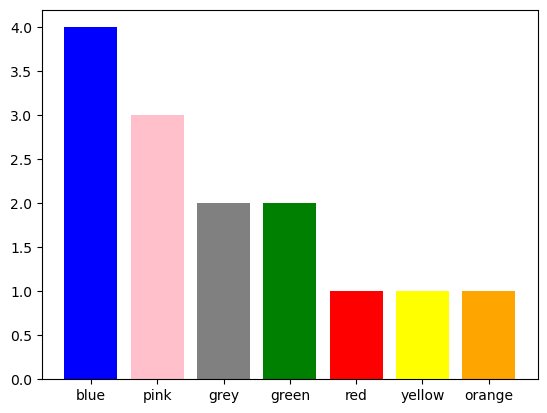

In [34]:
# barchart of sorted word counts
d = {'blue':count_b['blue'], 'pink':count_b['pink'], 'grey':count_b['grey'],'green':count_b['green'],'red':count_b['red'],'yellow':count_b['yellow'], 'orange':count_b['orange']}
plt.bar(range(len(d)), list(d.values()), align='center', color=d.keys())
_ = plt.xticks(range(len(d)), list(d.keys()))

In [36]:
print('counts_b : ', count_b)
print('count : ', len(count_b))

counts_b :  Counter({'blue': 4, 'pink': 3, 'grey': 2, 'green': 2, 'red': 1, 'yellow': 1, 'orange': 1})
count :  7


In [130]:
ds = 'regex_sum.txt'
try:
    with open(ds, 'r') as file:
        lines = file.readlines() #read all lines into a list
        # print(line)
except FileNotFoundError:
    print(f'File not found: {ds}')
    exit(1)
    
# count_lines = []
# for line in lines:
#     line = line.strip() #remove spaces
#     gaps = re.findall('[0-9]+', line) #extract numbers only
#     # print(gaps)
    
#     if gaps:
#         count_lines.extend(map(int,gaps)) #change strings into integers
        
# print(count_lines)
# print(f'Total: {sum(count_lines)}')

# list-comprehension
count_lines = sum([int(num) for line in lines for num in re.findall('[\d]+', line)]) #\d = [0-9]
# print(sum(count_lines))
print(count_lines)
        

491577


In [142]:
#Request / response cycle

import socket
mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('generationalwealthafrica.com' , 80))
cmd = 'GET http://generationalwealthafrica.com HTTP/1.0\r\n\r\n'.encode()
mysock.send(cmd)

while True:
    data = mysock.recv(512)
    if len(data) < 1:
        break
    print(data.decode(),end='')

mysock.close()

HTTP/1.0 301 Moved Permanently
Content-Type: text/plain; charset=utf-8
Date: Thu, 29 Aug 2024 07:51:55 GMT
Location: https://generationalwealthafrica.com/
Server: Netlify
X-Nf-Request-Id: 01J6EHX813C8M9F7W52CZXQES3
Content-Length: 52

Redirecting to https://generationalwealthafrica.com/

In [136]:
#Request / response cycle
import socket

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org', 80))
cmd = 'GET http://data.pr4e.org/intro-short.txt HTTP/1.0\r\n\r\n'.encode()
mysock.send(cmd)

while True:
    data = mysock.recv(512)
    if len(data) < 1:
        break
    print(data.decode(),end='')

mysock.close()

HTTP/1.0 200 OK
Date: Thu, 29 Aug 2024 07:45:43 GMT
Server: Apache/2.4.52 (Ubuntu)
Last-Modified: Sat, 13 May 2017 11:22:22 GMT
ETag: "1d3-54f6609240717"
Accept-Ranges: bytes
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Content-Type: text/plain
Content-Length: 467

Why should you learn to write programs?

Writing programs (or programming) is a very creative 
and rewarding activity.  You can write programs for 
many reasons, ranging from making your living to solving
a difficult data analysis problem to having fun to helping
someone else solve a problem.  This book assumes that 
everyone needs to know how to program, and that once 
you know how to program you will figure out what you want 
to do with your newfound skills.  


In [5]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import ssl 


# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

url = input('Enter') #use this ---- http://py4e-data.dr-chuck.net/comments_2038554.html
html = urlopen(url, context=ctx).read()
soup = BeautifulSoup(html, 'html.parser')
tags = soup('span') #look for span tags only

count = 0 #put into total count

 # Look at the parts of a tag
for tag in tags:
    st = int(tag.text)
    count += st #increment in total
    print('sum:',count)


Enter http://py4e-data.dr-chuck.net/comments_2038554.html


sum: 97
sum: 190
sum: 281
sum: 371
sum: 460
sum: 548
sum: 636
sum: 723
sum: 805
sum: 886
sum: 962
sum: 1038
sum: 1114
sum: 1189
sum: 1264
sum: 1336
sum: 1406
sum: 1473
sum: 1533
sum: 1592
sum: 1650
sum: 1702
sum: 1751
sum: 1799
sum: 1847
sum: 1894
sum: 1940
sum: 1979
sum: 2015
sum: 2051
sum: 2086
sum: 2119
sum: 2148
sum: 2176
sum: 2203
sum: 2230
sum: 2252
sum: 2271
sum: 2290
sum: 2305
sum: 2319
sum: 2333
sum: 2346
sum: 2359
sum: 2370
sum: 2379
sum: 2384
sum: 2389
sum: 2393
sum: 2396


In [193]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import ssl 


# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE


url = input('Enter') #use this ---- http://py4e-data.dr-chuck.net/known_by_Marvin.html

repeat = 7
position = 18


for i in range(repeat):
    html = urlopen(url, context=ctx).read()
    soup = BeautifulSoup(html, 'html.parser')
    
    tags = soup('a') #look for span tags only
    # print(tags)

    #check tags are more that 18
    if len(tags) < position:
        print(f'Less than {positions} in the links')
        break

    tag = tags[position - 1] #find the tag at the position
    print(f"Name at position {position}: {tag.text}")

    url = tag.get('href', None) #set the url for the next iteration
    print(f'follow this url: {url}')
    

print(f'Final output after, {repeat} repetitions: {url}')


Enter http://py4e-data.dr-chuck.net/known_by_Marvin.html


Name at position 18: Yago
follow this url: http://py4e-data.dr-chuck.net/known_by_Yago.html
Name at position 18: Daood
follow this url: http://py4e-data.dr-chuck.net/known_by_Daood.html
Name at position 18: Jillian
follow this url: http://py4e-data.dr-chuck.net/known_by_Jillian.html
Name at position 18: Bradly
follow this url: http://py4e-data.dr-chuck.net/known_by_Bradly.html
Name at position 18: Steffie
follow this url: http://py4e-data.dr-chuck.net/known_by_Steffie.html
Name at position 18: Mitchel
follow this url: http://py4e-data.dr-chuck.net/known_by_Mitchel.html
Name at position 18: Caelen
follow this url: http://py4e-data.dr-chuck.net/known_by_Caelen.html
Final output after, 7 repetitions: http://py4e-data.dr-chuck.net/known_by_Caelen.html


In [31]:
# You are to look through all the <comment> tags and find the <count> values sum the numbers. The closest sample code that shows how to parse XML is xml3.py.
# To make the code a little simpler, you can use an XPath selector string to look through the entire tree of XML for any tag named 'count' with the following line of code:

import urllib.request
import xml.etree.ElementTree as ET

url = input('Enter location: ')
if len(url) < 1 : 
    url = 'http://py4e-data.dr-chuck.net/comments_2038556.xml' #use this url as input location above

print('Retrieving', url)
uh = urllib.request.urlopen(url)
data = uh.read()

print('Retrieved',len(data),'characters')
tree = ET.fromstring(data)

counts = tree.findall('.//count') # name tag in the tree (count)

nums = list()
for result in counts:
    # convert result to integer then add to the list
    nums.append(int(result.text))
    

print('Count:', len(nums))
print('Sum:', sum(nums))

Enter location:  http://py4e-data.dr-chuck.net/comments_2038556.xml


Retrieving http://py4e-data.dr-chuck.net/comments_2038556.xml
Retrieved 4234 characters
Count: 50
Sum: 2501


In [79]:
# Extracting Data from JSON

# In this assignment you will write a Python program somewhat similar to http://www.py4e.com/code3/json2.py. The program will prompt for a URL, read the JSON data from that URL using urllib and then parse and extract the comment counts from the JSON data, compute the sum of the numbers in the file and enter the sum below:
# We provide two files for this assignment. One is a sample file where we give you the sum for your testing and the other is the actual data you need to process for the assignment.

# Sample data: http://py4e-data.dr-chuck.net/comments_42.json (Sum=2553)
# Actual data: http://py4e-data.dr-chuck.net/comments_2038557.json (Sum ends with 33)


import json
import urllib.request
import xml.etree.ElementTree as ET


url = input('Enter location: ') #use given url
if len(url) < 1 : 
    url = 'http://py4e-data.dr-chuck.net/comments_2038557.json'

print('Retrieving', url)
uh = urllib.request.urlopen(url) #parsing url to read in python
data = uh.read()
print('Retrieved',len(data),'characters') #length of characters
info = json.loads(data) #changing the data into json format
# print(info)
print('User count:', len(info)) #len of json data

total_count = 0

for item in info['comments']:
    count = int(item['count']) #changing str to integer
    total_count += count #accumulative counting
    

print('Total count: ', total_count)

Enter location:  http://py4e-data.dr-chuck.net/comments_2038557.json


Retrieving http://py4e-data.dr-chuck.net/comments_2038557.json
Retrieved 2731 characters
User count: 2
Total count:  2433


In [25]:
# In this assignment you will write a Python program somewhat similar to http://www.py4e.com/code3/opengeo.py. 
# The program will prompt for a location, contact a web service and retrieve JSON for the web service and parse that data, 
# and retrieve the first plus_code from the JSON. An Open Location Code is a textual identifier that is another form of 
# address based on the location of the address.


import urllib.request, urllib.parse
import json, ssl

# Heavily rate limited proxy of https://www.geoapify.com/ api
serviceurl = 'https://py4e-data.dr-chuck.net/opengeo?'

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
address = input('Enter location: ')
# while True:
    
if len(address) < 1: 
       print('No location found') 

address = address.strip()
parms = dict()
parms['q'] = address

url = serviceurl + urllib.parse.urlencode(parms)

print('Retrieving', url)
uh = urllib.request.urlopen(url, context=ctx)
data = uh.read().decode()
print('Retrieved', len(data), 'characters', data[:20].replace('\n', ' '))

try:
    js = json.loads(data)
    # print(js) #print the json file not in order or indent
except:
    js = None

if not js or 'features' not in js:
    print('==== Download error ===')
    print(data)
    exit()

if len(js['features']) == 0:
    print('==== Object not found ====')
    print(data)
    exit()

print(json.dumps(js, indent=4)) #prints a nicely formated indent json

lat = js['features'][0]['properties']['lat']
lon = js['features'][0]['properties']['lon']
print('lat', lat, 'lon', lon)
location = js['features'][0]['properties']['formatted']
print(location)





Enter location:  Pretoria


Retrieving https://py4e-data.dr-chuck.net/opengeo?q=Pretoria
Retrieved 1410 characters {"type":"FeatureColl
{
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {
                "datasource": {
                    "sourcename": "openstreetmap",
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Database License",
                    "url": "https://www.openstreetmap.org/copyright"
                },
                "display_name": "Pretoria",
                "country": "South Africa",
                "country_code": "za",
                "state": "Gauteng",
                "county": "City of Tshwane Metropolitan Municipality",
                "city": "Pretoria",
                "postcode": "0126",
                "lon": 28.1879101,
                "lat": -25.7459277,
                "state_code": "GT",
                "result_type": "postcode",
                "